<h1 style = "font-size:3rem;color:orange">Actividad C1 P1 - José Jesús La Casa Nieto</h1>

#### Librerías

In [39]:
from skimage import io
import matplotlib.pyplot as plt
from sklearn import preprocessing
import numpy as np
import cv2

#### 0) Cargar una de las imágenes histológicas

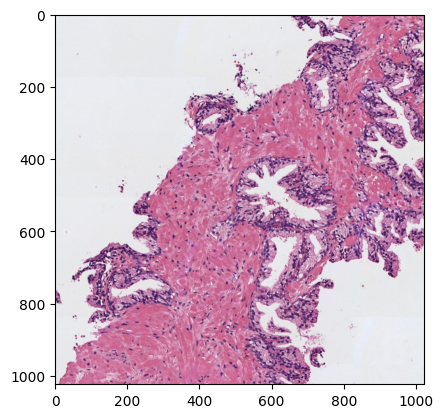

In [31]:
# Utilizar la librería skimage.io para leer la imagen 'histo_x.jpg' en formato RGB
histo_1_rgb = io.imread("histo_1.jpg", as_gray=False)
img = histo_1_rgb.copy()

# Normalizar la imagen para que los píxeles se encuentren en el rango [0, 1]
normalized_img = img.astype('uint8') / 255

# Visualizar la imagen
plt.imshow(normalized_img)
plt.show()

#### 1) Realizar una transformación de color para convertir la imagen al espacio de color CMYK

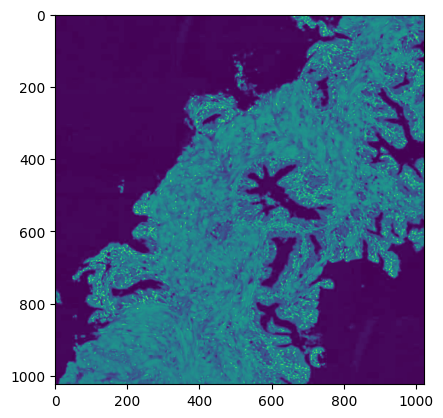

In [41]:
# Extraer la componente magenta de la imagen (que corresponde a la región tisular)
with np.errstate(invalid='ignore', divide='ignore'):
    K = 1 - np.max(normalized_img, axis=2)
    C = (1 - normalized_img[:,:,0] - K)/(1 - K)
    M = (1 - normalized_img[:,:,1] - K)/(1 - K)
    Y = (1 - normalized_img[:,:,2] - K)/(1 - K)

CMYK = (np.dstack((C,M,Y,K))*255).astype('uint8')
C,M,Y,K = cv2.split(CMYK)

# Visualizar la imagen del canal magenta
plt.imshow(M)
plt.show()

#### 2) Umbralizar la imagen para separar los píxeles del fondo de la región tisular

In [ ]:
# Aplicar un filtro gaussiano de tamaño 5x5 y después utilizar el método de Otsu de manera que
# los píxeles correspondientes al lumen y al background de la imagen sean 1s y el resto de los píxeles tengan un valor de 0.
# Nota: Recordar que el método de Otsu requiere como input una imagen en el rango [0-255] en formato "uint8".
# Visualizar la máscara resultante